## Brute force min search

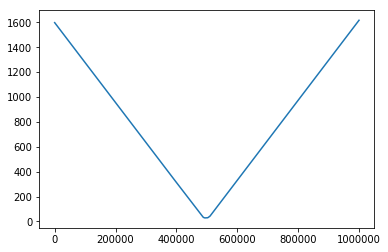

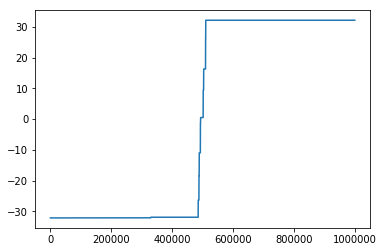

-0.68639999836295829

In [8]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random value between -5 to 5
def gen_vector(n):
    return [ (random.random()-0.5) * 10 for i in range(10) ]

# || beta * x - y ||_1
def objective(x, y, b):
    return np.linalg.norm(b*x - y, ord=1)
#random.seed(163)

def num_der(x, y, b, d):
    return (objective(x, y, b+d) - objective(x, y, b-d)) / (2*d)

n = 20
x = np.array(gen_vector(n))
y = np.array(gen_vector(n))
# x = np.array([1,2,3])
# y = np.array([4,5,6])

beta_list = np.arange(-50.0, 50.0, 0.0001)

obj = np.array([ objective(x, y, b) for b in beta_list ] )
obj_dir = np.array([ num_der(x, y, b, 0.0001) for b in beta_list ])

plt.figure()
plt.plot(obj)
plt.figure()
plt.plot(obj_dir)
plt.show()

b_optimal = beta_list[np.argmin(obj)]

b_optimal

## Gradient descend

In [9]:
# Small number used to computer derivative
d = 0.0001

# Initial guess
beta = random.uniform(-5.0, 5.0)
beta = 0.0
# Learning rate
r = 1.0 / 20 * 0.01

init_slope = num_der(x, y, beta, d)
init_sign = np.sign(init_slope)
next_slope = int(init_slope)
next_sign = init_sign
while (next_sign == init_sign):
    beta = beta - r * next_slope
    next_slope = num_der(x, y, beta, d)
    next_sign = int(np.sign(next_slope))
    
beta

-0.68652219666818226

## Critical beta search O(n)

In [11]:

def find_crit_betas(x, y):
    b_list = []
    for pair in zip(x,y):
        # Solve for optimal beta in every dimention
        x_i = pair[0]
        y_i = pair[1]
        b_i = float(y_i) / x_i
        b_list.append(b_i)
        
    return b_list

b_list = find_crit_betas(x, y)
o_min = objective(x, y, 0)
b_argmin = 0
for b in b_list:
    o = objective(x, y, b)
    if o < o_min:
        o_min = o
        b_argmin = b
        
b_argmin

-0.68644698810850779